In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Import requried libaries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.applications import VGG16 #fine-tuning using VGG16
from keras.layers import Input
from keras.layers.pooling import AveragePooling2D

train_datagen = ImageDataGenerator(validation_split=0.3)
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/Colab Notebooks/Project_Images_FULLsize/Images/Sample_Images', target_size=(1024,1024), class_mode='categorical',batch_size=500,
        subset='training')
validation_generator = train_datagen.flow_from_directory(
         '/content/drive/My Drive/Colab Notebooks/Project_Images_FULLsize/Images/Sample_Images', target_size=(1024,1024), class_mode='categorical',batch_size=500,
        subset='validation')

Found 2832 images belonging to 4 classes.
Found 1211 images belonging to 4 classes.


In [0]:
# confirm the iterator works
batchX, batchy = train_generator.next()
#print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

In [0]:
#Load the VGG16 model
# resize default image size to 128x128 to speed up model
vgg_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(1024,1024,3)),)

#Add FC layer and output layer
x = vgg_model.output
x = AveragePooling2D(pool_size=(4, 4))(x)
x = Flatten(name="flatten")(x)
x = BatchNormalization()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(4, activation='softmax', kernel_initializer='random_normal',name='predict_classes')(x) #connect all layers I've created

In [0]:
#create my new model, setting outout as 'x'
my_model = Model(input=vgg_model.input, output=x)

#Freeze VGG16 base layers so weights are not be updated during backpropagation
for layer in vgg_model.layers:
    layer.trainable = False
    
#print final model configuration after fine-tuning VGG16
my_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 640, 640, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 640, 640, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 640, 640, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 320, 320, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 320, 320, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 320, 320, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 160, 160, 128)     0   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("pr...)`
  """Entry point for launching an IPython kernel.


In [0]:
#spliting training and testing data\n
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(batchX, batchy,test_size=0.3,random_state=0)

In [0]:
#Compiling the model
my_model.compile(optimizer ='adam',loss='categorical_crossentropy', metrics =['accuracy'])

In [0]:
# Fitting training dataset to the model
# Taking the default 32 batch size with 50 iterations
history = my_model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=32, epochs=25, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 350 samples, validate on 150 samples
Epoch 1/25
350/350 [==============================] - 125s 357ms/step - loss: 1.6225 - acc: 0.2229 - val_loss: 1.8711 - val_acc: 0.2600
Epoch 2/25
350/350 [==============================] - 121s 347ms/step - loss: 1.2585 - acc: 0.4143 - val_loss: 1.6433 - val_acc: 0.2667
Epoch 3/25
350/350 [==============================] - 121s 346ms/step - loss: 1.1413 - acc: 0.4800 - val_loss: 1.6018 - val_acc: 0.2667
Epoch 4/25
350/350 [==============================] - 120s 344ms/step - loss: 1.0669 - acc: 0.5457 - val_loss: 1.6123 - val_acc: 0.2867
Epoch 5/25
350/350 [==============================] - 121s 345ms/step - loss: 0.9884 - acc: 0.6257 - val_loss: 1.6179 - val_acc: 0.2933
Epoch 6/25
350/350 [==============================] - 120s 342ms/step - loss: 0.9314 - acc: 0.6571 - val_loss: 1.6433 - val_acc: 0.2867
Epoch 7/25
350/350 [======================

In [0]:
#Print the model accuracy using the training data
score = my_model.evaluate(x_train,y_train)
print(score)
print()
score1 = my_model.evaluate(x_test,y_test)
print(score1)

350/350 [==============================] - 86s 246ms/step
[0.05325191663844245, 1.0]

150/150 [==============================] - 37s 248ms/step
[2.4161599604288737, 0.28666666785875955]


In [0]:
#setting y_hat
y_pred = my_model.predict(x_test)

#Setting the axis for y_test and y_pred in order to plot confusion matrix and multiclass classification report
y_test_non_category = [ np.argmax(t) for t in y_test ]
y_predict_non_category = [ np.argmax(t) for t in y_pred ]

#print(y_predict_non_category)

In [0]:
#Creating confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

conf_mat = confusion_matrix(y_test_non_category, y_predict_non_category)

#Creating accuracy report
target_names = ['destroyed','major_damage','minor_damage','no_damage']
class_rpt = classification_report(y_test_non_category, y_predict_non_category, labels =[0,1,2,3],target_names=target_names)

#Printing Accruacy report
print('Classification Report:','\n',class_rpt) 

Classification Report: 
               precision    recall  f1-score   support

   destroyed       0.38      0.42      0.40        45
major_damage       0.34      0.33      0.33        43
minor_damage       0.14      0.10      0.12        29
   no_damage       0.19      0.21      0.20        33

    accuracy                           0.29       150
   macro avg       0.26      0.27      0.26       150
weighted avg       0.28      0.29      0.28       150



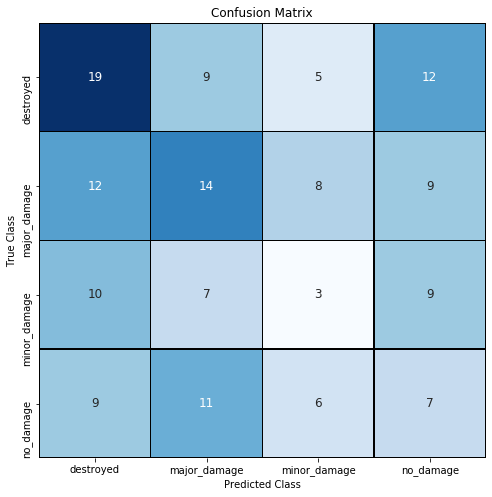

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt     

#Printing confusion matrix
plt.figure(figsize=(8, 8))
ax= plt.subplot()
sns.heatmap(conf_mat,cmap="Blues",annot=True,annot_kws={"size": 12},linewidths=.5, linecolor="black", cbar=False); #annot=True to annotate cells
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['destroyed','major_damage','minor_damage','no_damage']); ax.yaxis.set_ticklabels(['destroyed','major_damage','minor_damage','no_damage']);

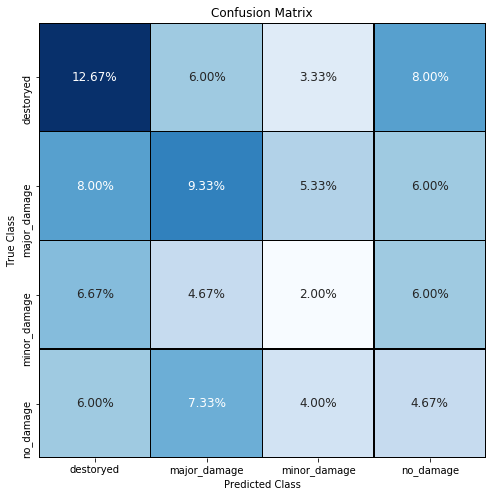

In [0]:
plt.figure(figsize=(8, 8))
ax= plt.subplot()
sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt='.2%', cmap='Blues',annot_kws={"size": 12},linewidths=.5, linecolor="black", cbar=False)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['destoryed','major_damage','minor_damage','no_damage']); ax.yaxis.set_ticklabels(['destoryed','major_damage','minor_damage','no_damage']);

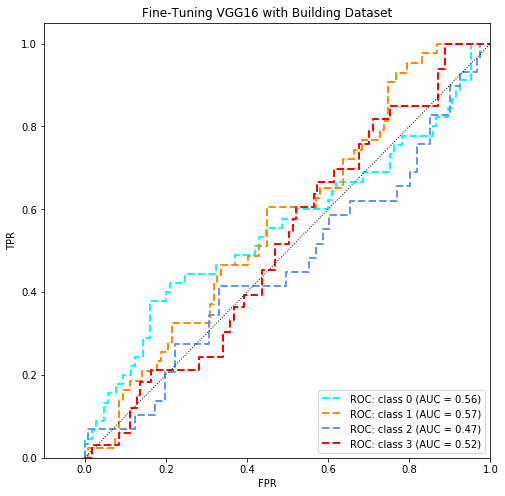

In [0]:
#ROC for the 4 classes
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

#def 3 classes
n_classes = 4

# Compute ROC curve and AUC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

#loop all ROC curves 
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

#average and compute AUC
mean_tpr /= n_classes

# Plot all ROC curves
plt.figure(figsize=(8, 8))
plt.figure(1)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, linestyle='--',lw=2,
             label='ROC: class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k:', lw=1)
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Fine-Tuning VGG16 with Building Dataset')
plt.legend(loc="lower right")
plt.show()

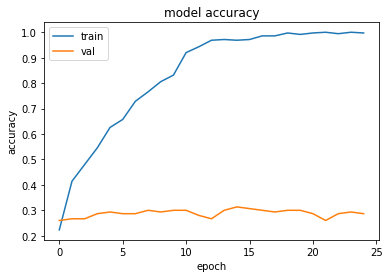

In [0]:
#history = my_model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=32, epochs=25, verbose=1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

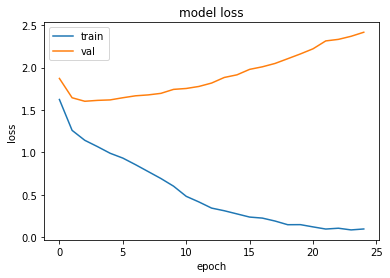

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()